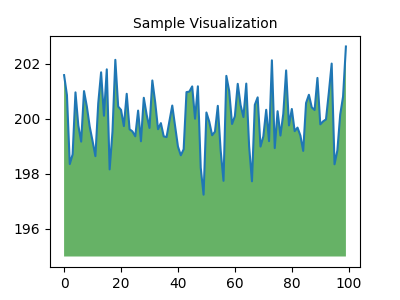

In [1]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

In [4]:
doc = nlp(u"May i go to washingto")

show_ents(doc)

In [5]:
doc = nlp(u"Can i plese borow 500 dollars from you to buy some Microsoft stock?")

for ent in doc.ents:
  print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

borow 500 dollars 3 6 12 29 MONEY
Microsoft 11 12 51 60 ORG


In [6]:
doc = nlp(u"Can i plese borow 500 dollars from you to buy some Microsoft stock")

for token in doc:
  print(token.text)

Can
i
plese
borow
500
dollars
from
you
to
buy
some
Microsoft
stock


In [7]:
doc = nlp(u" Tesla open the US factory in $6million")

show_ents(doc)

US - GPE - Countries, cities, states
6million - MONEY - Monetary values, including unit


In [8]:
from spacy.tokens import Span

ORG = doc.vocab.strings[u'ORG']

new_ent = Span(doc, 0, 1,label=ORG)

doc.ents = list(doc.ents) + [new_ent]

In [9]:
show_ents(doc)

  - ORG - Companies, agencies, institutions, etc.
US - GPE - Countries, cities, states
6million - MONEY - Monetary values, including unit


In [10]:
doc = nlp(u"Our company plans to introduce a new vacuum cleaner."u"If succesful, the vacuum cleaner will be our first product.")

show_ents(doc)

first - ORDINAL - "first", "second", etc.


In [11]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [12]:
phrase_list = ['vacuum cleaner', 'vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

In [13]:
matcher.add('newproduct', None, *phrase_patterns)

matches = matcher(doc)

matches

[(2689272359382549672, 7, 9), (2689272359382549672, 14, 16)]

In [14]:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1], match[2],label=PROD) for match in matches]

doc.ents = list(doc.ents) + new_ents

In [15]:
show_ents(doc)

vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
vacuum cleaner - PRODUCT - Objects, vehicles, foods, etc. (not services)
first - ORDINAL - "first", "second", etc.


In [16]:
doc = nlp(u'Originally priced at $29.50, the sweater was mark down to five dollars')

show_ents(doc)

29.50 - MONEY - Monetary values, including unit
five dollars - MONEY - Monetary values, including unit


In [17]:
len([ ent for ent in doc.ents if ent.label_ =='MONEY'])

2

In [23]:
for sent in doc.sents:
  docx =nlp(sent.text)
  if docx.ents:
    displacy.render(docx, style='ent', jupyter =True)
  else:
      print(docx.text)


In [22]:
options = {'ents': [ 'ORG','PRODUCT']}
displacy.render(doc, style='ent', jupyter=True, options=options)

In [19]:
import spacy
from spacy import displacy

In [24]:
colors= {'ORG': 'linear-gradient(90deg,#aa9cfc,#fc9ce7)','MONEY':'radial-gradient(yellow,green)'}
options ={'ents': ['ORG','MONEY'],'colors':colors}
displacy.render(doc, style='ent',jupyter=True,options=options)

In [25]:
#sentence segmentation
doc = nlp(u'This is the first sentennce. This is another sentence. This is the last sentence.')
for sent in doc.sents:
  print(sent)

This is the first sentennce.
This is another sentence.
This is the last sentence.


In [26]:
print(doc[1])

is


In [27]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentennce.,
 This is another sentence.,
 This is the last sentence.]

In [28]:
print(doc_sents[1].start,doc_sents[1].end)

6 11


In [29]:
type(doc_sents[1])

spacy.tokens.span.Span

In [30]:
doc2 = nlp(u'This is a sentence. This is a sentence. This is a sentence.')
for token in doc2:
  print(token.is_sent_start, ' '+token.text)

True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .
True  This
False  is
False  a
False  sentence
False  .


In [31]:
doc3 = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
for sent in doc3.sents:
  print(sent)

"Management is doing the right things; leadership is doing the right things."
-Peter Drucker


In [34]:
from spacy.language import Language

# Add A New Rule To The Pipeline
@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
  for token in doc[:-1]:
    if token.text == ';':
      doc[token.i+1].is_sent_start = True
  return doc

nlp.add_pipe("set_custom_boundaries", before='parser')

nlp.pipe_names

['tok2vec',
 'tagger',
 'set_custom_boundaries',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner']

In [ ]:
doc4 = nlp(u'"Management is doing the right things; leadership is doing the right things." -Peter Drucker')
for sent in doc4.sents:
  print(sent)